# Project 1.

In a study of memory processes, animals were tested in a one-trial avoidance-learning task. The animals were presented with a fear-producing stimulus on the learning trial as soon as they stepped across a line in the test chamber. The dependent variable was the time it took them to step across the line on the test trial. Three groups of animals differed in terms of the area in which they had electrodes implanted in their cortex (Neutral site, Area A, or Area B). Each group was further divided and given electrical stimulation 50, 100, or 150 milliseconds after crossing the line and being presented with the fear-inducing stimulus. If the brain area that was stimulated is involved in memory, stimulation would be expected to interfere with memory consolidation and retard learning of the avoidance response, and the animal should not show any hesitancy in recrossing the line. The data on latency to recross the line are as follows:

<img src="files/p9.png" width="600"/>

The data are found in https://github.com/amanirad/Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics.

1. Plot ungrouped as well as grouped frequency distribution for these data.
2. Create the histogram for the data using a reasonable number of intervals. Fit the probability density of each condition on the data.
3. Plot ungrouped as well as grouped boxplot for these data.
4. Discuss the statistical summary of the data in each condition in the form of statistics of mean, standard deviation, median, quantiles, etc.
5. Does this data include outliers? Should they be removed? How? Remove them if necessary.
6. Check the normality of the data using: 
 1. Find and plot a sampling distribution using a selection of samples such as 50 with sample size equals to 5 from the data in the table above.  
    1. Compare the means and the standard deviations for the distribution in main data and the sampling distribution of the mean.
    2. What would the Central Limit Theorem lead you to expect in this situation?
    3. Do the data correspond to what you would predict?
    4. In what way would the result differ if you had drawn more samples of size 5?
    5. In what way would the result differ if you had drawn 50 samples of size 15?
 2. Check out the QQ plot. 
3. Use the appropriate statistical test and check its p-value and discuss it. What is the null hypothesis? Outline the hypothesis-testing procedure that you have just applied. Compute 95% confidence llimit on mean (or median).
7. Is the data distribution symmetrical? Examine and discuss it using an appropriate statistical test.


### Project 1 answer sheet for Cognitive Rehabilitation Statistics Course, By Saeed_Rezaei_Afshar

In [2]:
Animal_data = read.table("project_1.dat", header = TRUE)

In [5]:
library(rstatix)
library(ggpubr)
library(lattice)
library(insight)
library(ggplot2)
library(MASS)
library(moments)


Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter


Loading required package: ggplot2


Attaching package: 'MASS'


The following object is masked from 'package:rstatix':

    select




In [6]:
Animal_data = Animal_data %>% mutate (Area = ifelse (Area == "1", "Neutral", ifelse(Area == "2", "AreaA", "AreaB")))

In [7]:
Animal_data = Animal_data %>% mutate (Duration = ifelse (Duration == "1", "Short", ifelse(Duration == "2", "Moderate" , "Long")))

In [43]:
Animal_data

uid,Area,Duration,Time
<int>,<chr>,<chr>,<int>
1,Neutral,Short,25
2,Neutral,Short,30
3,Neutral,Short,28
4,Neutral,Short,40
5,Neutral,Short,20
6,Neutral,Moderate,30
7,Neutral,Moderate,25
8,Neutral,Moderate,27
9,Neutral,Moderate,35


In [6]:
Animal_data = transform(Animal_data,uid = as.integer(uid))

In [27]:
Animal_data = transform(Animal_data,Area = as.integer(Area))

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"


### Data was imported, and since Area and Duration rows were named by 1,2,3 with data type of integer, I changed them to character based tags for better contrast and data recall.

# Question No. 1

## Ungrouped data distribution

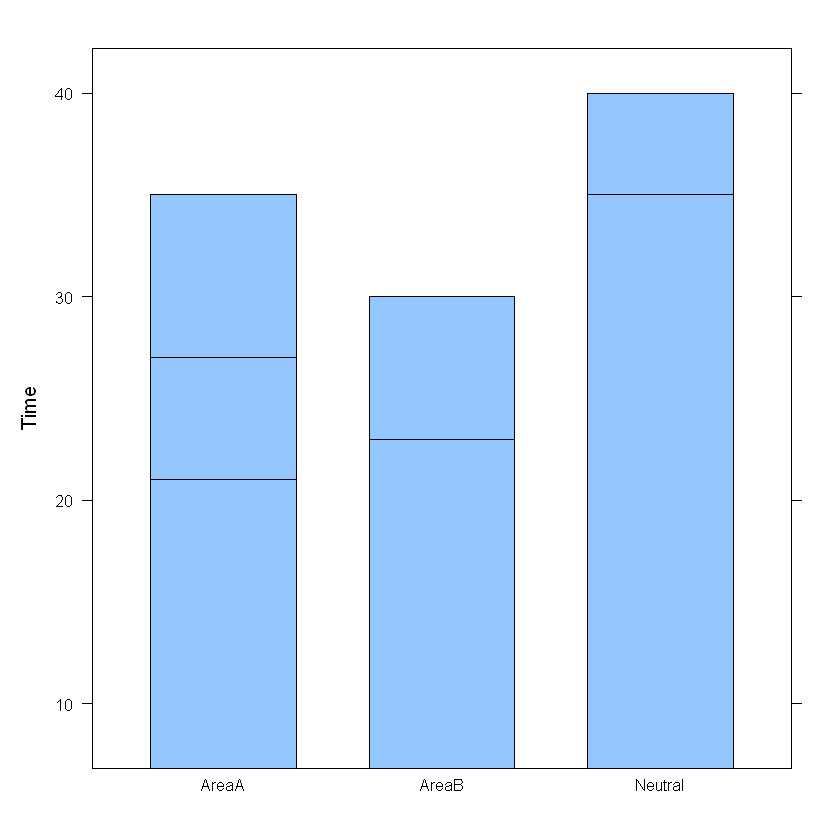

In [8]:
barchart(Time ~ Area, data = Animal_data)

#### Its observable from bars that both Area A and Area B have lower Time value than the Neutral group. so we may have a possible significance.

### Grouped data distribution using Bar Chart

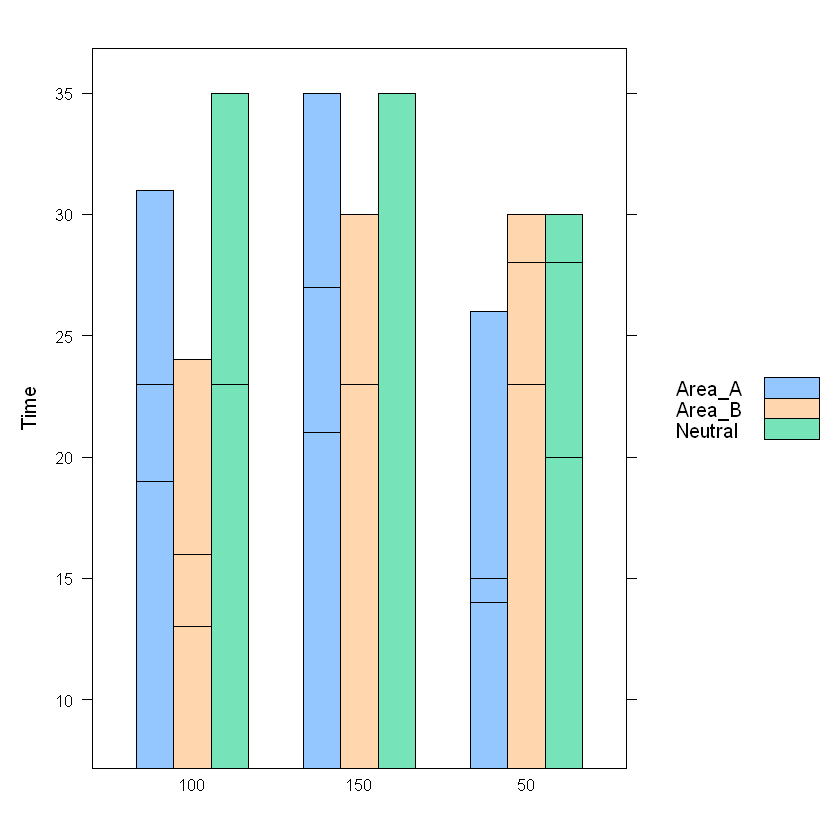

In [90]:
barchart(Time ~ Duration, data = Animal_data, groups = Area, auto.key=list(space='right'))

#### Much better view of data distribution, making it more comparable. Area A stimulation in 50ms duration has lower time, also, Area B in 100ms duration has much more significant difference comapred to Area A and Neutral.

# Question No. 2

In [14]:
Animal_data$Time_sorted = sort(Animal_data$Time)

## Histrogram and Density.

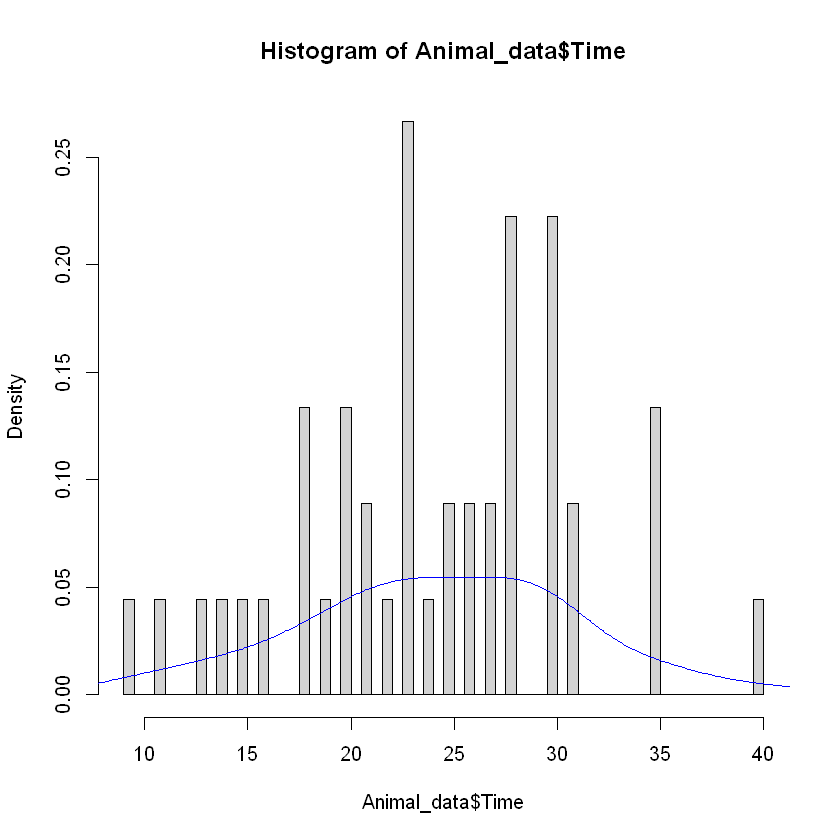

In [95]:
hist(Animal_data$Time, breaks = 100, probability = TRUE) 
lines(density(Animal_data$Time), col = "blue")

#### We can see that the probability of an observed data to fall under the curve, is more probable between 15-30/35 ms Time, which also means based on frequency that greater number of our data falls under the same range mentioned. also data distribution "looks" like a normal distribution.

## Grouped probability density fit on the data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


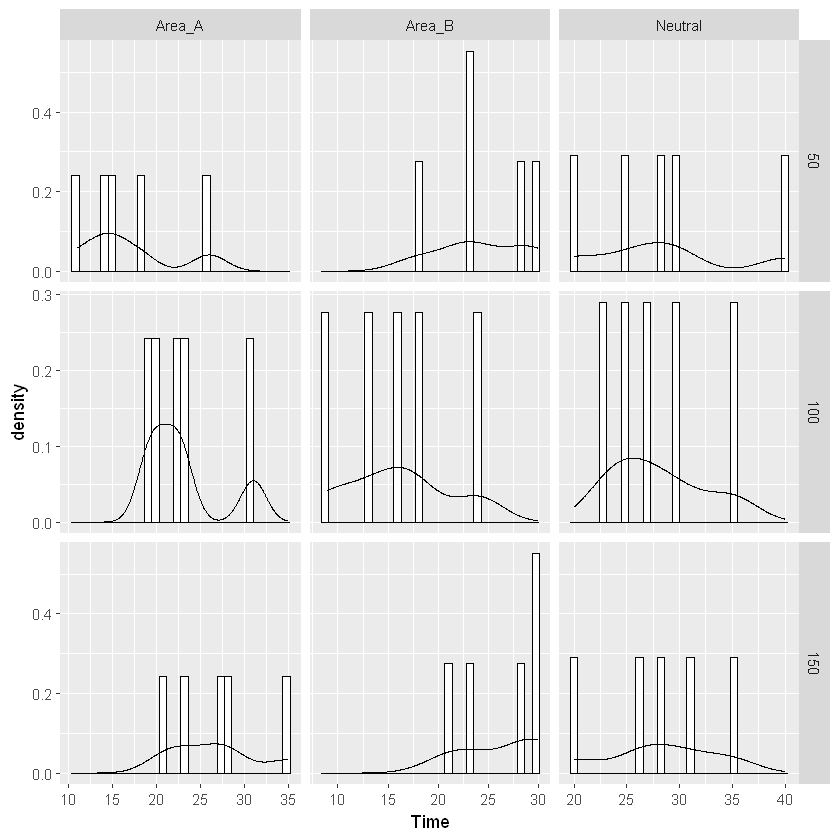

In [33]:
ggplot(Animal_data, aes(x = Time, y=..density..)) + geom_histogram(fill = "white", colour = "black") + facet_grid(Duration ~ Area, scales = "free") + geom_density()


#### An interesting point of view. We can see that animals stimulated in Area A with 50ms stimulation respond so quicker than other groups, also animals stimulated in Area B with 100ms stimulation also responded so quicker than other groups.

# Question No. 3

## UnGrouped Boxplot

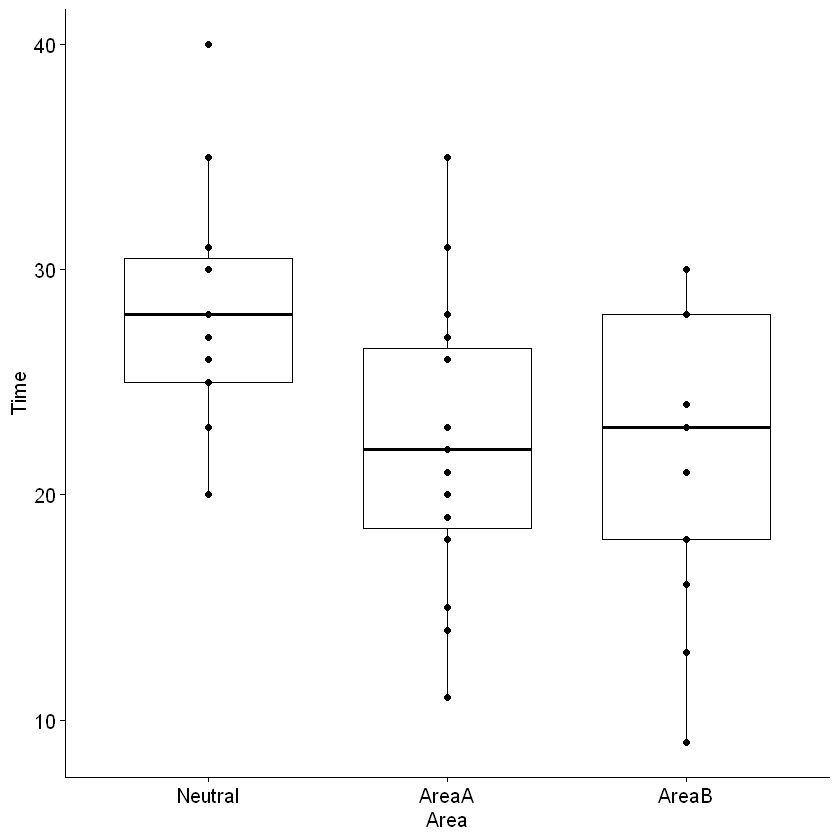

In [10]:
ggboxplot(Animal_data, x= "Area", y = "Time", add = "point")

### Seeminlgy this boxplot tells us the same things we mentioned of our observation in bar plots

## Grouped Boxplot

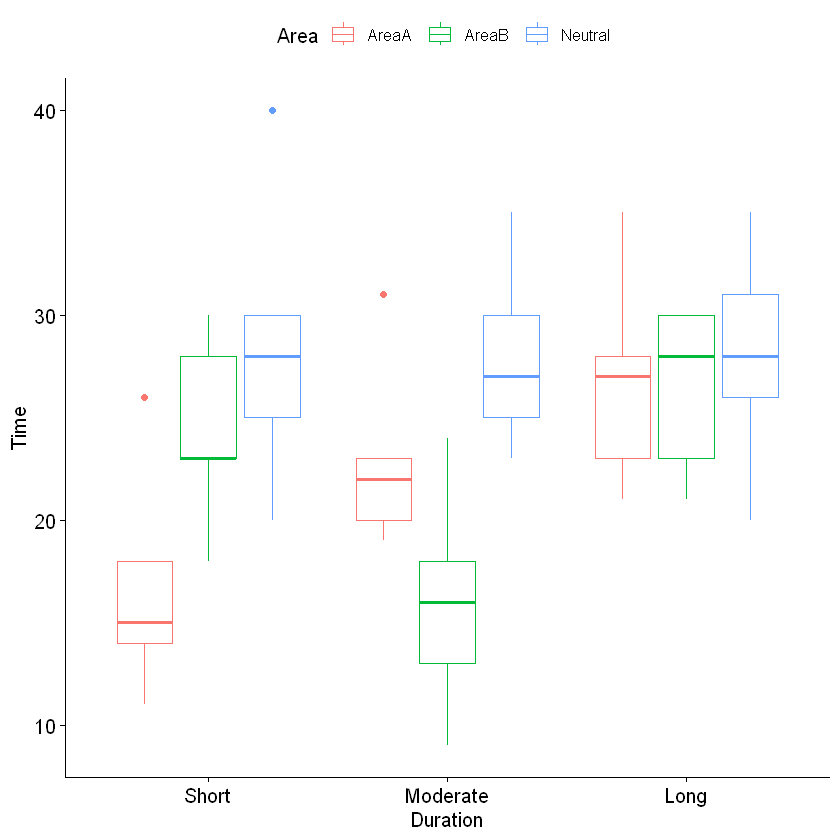

In [9]:
ggboxplot(Animal_data, x = "Duration", y = "Time", color = "Area")

### The comment in ungrouped is true here to, but also our outliers can be seen.

# Question No. 4

In [9]:
Animal_data %>% group_by(Area, Duration) %>% get_summary_stats(Time)

Area,Duration,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area_A,50,Time,5,11,26,15,14,18,4,4.448,16.8,5.718,2.557,7.100
Area_A,100,Time,5,19,31,22,20,23,3,2.965,23.0,4.743,2.121,5.890
Area_A,150,Time,5,21,35,27,23,28,5,5.930,26.8,5.404,2.417,6.710
Area_B,50,Time,5,18,30,23,23,28,5,7.413,24.4,4.722,2.112,5.863
Area_B,100,Time,5,9,24,16,13,18,5,4.448,16.0,5.612,2.510,6.969
Area_B,150,Time,5,21,30,28,23,30,7,2.965,26.4,4.159,1.860,5.164
Neutral,50,Time,5,20,40,28,25,30,5,4.448,28.6,7.403,3.311,9.192
Neutral,100,Time,5,23,35,27,25,30,5,4.448,28.0,4.690,2.098,5.824
Neutral,150,Time,5,20,35,28,26,31,5,4.448,28.0,5.612,2.510,6.969


## Statistical summary discussion
### Neutral
##### Mean Comparison: apparenly they fit quite on top of each other on Neutral Area, so as expected for a sham group, there must be no difference in Neutral group.
##### Sandard Deviation: look similar on 100ms and 150ms, but 50ms differes alot! its probably due to outlier.
##### Quantiles: interestingly Q3-Q1 is equally 5 in all there durations, so apparenly not much to differ here, also expected.
##### Median: Medians are almost the same, aside from 50ms, probaby caused by outlier, which is exactly at 50ms.
### Area_A
##### Mean Comparison: Area_A group sims to differ much, especially Area_A with 50ms Duration with the other two.
##### Sandard Deviation: SDs for 100 and 150ms seem similar, but 50ms SD is off by alot, another sign of significant difference.
##### Quantiles: Q3-Q1s differ quite alot, which is another sign that we probably may have a significant change here.
##### Median: 100ms and 150ms differ but not significantly, but 50ms median seems to be off alot! another sign of difference.
### Area_B
##### Mean Comparison: Area_B group also sims interesting, especially on 100ms duration, similar to 50ms on Area_A, 100ms Stimulation in Area_B has a significantly diverse mean compared to 50ms and 100ms stimulations.  
##### Sandard Deviation: 50ms and 150 ms seem similar, but 100ms differs much more, which contributes towards probable meaningful difference. 
##### Quantiles: seem similar, except for 150ms which is off by 2 points, interesting, since max and mean values' difference seems much smaller than other groups.
##### Median: the median of 100ms stimlation is significantly different similar to its mean.

# Question No. 5

In [8]:
Animal_data %>% group_by(Area, Duration) %>% identify_outliers(Time)

Area,Duration,uid,Time,is.outlier,is.extreme
<chr>,<chr>,<int>,<int>,<lgl>,<lgl>
AreaA,Moderate,21,31,TRUE,FALSE
AreaA,Short,18,26,TRUE,FALSE
Neutral,Short,4,40,TRUE,FALSE


#### The results table shows that we have 3 outliers, but non of them is extreme, so we possibly can proceed to see if they interfere with distribution normalty or not

In [83]:
Animal_data = Animal_data[-c(4),]

##### since I was new to this, I tried removing outliers one by one, and comapared the data summary each time, after removing all of the three, I found out that If I remove Data number 4, Neural area, 50ms duration, standard deviation differences for Neutral data becomes much more natural looking than it was, since its only a sham group, used as control. but since thats not a reseasonable act of data deletion, I did not apply the removal afterwards.

## Using qq plot to see if the outliers we just disocovered are too far away from each groups Confidance Interval.

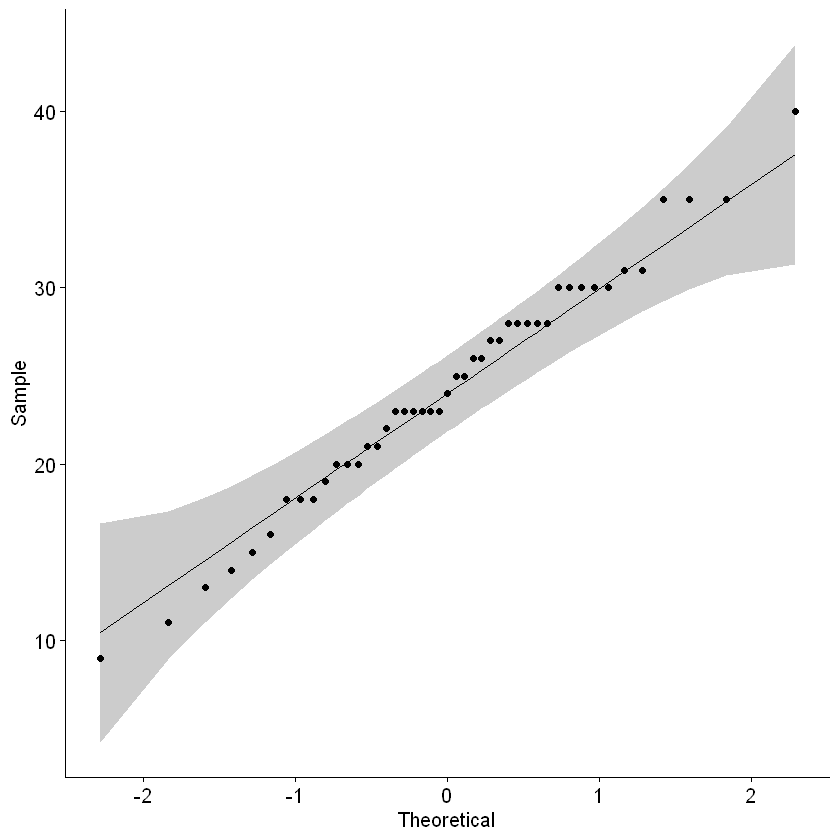

In [37]:
ggqqplot(Animal_data, "Time")

In [11]:
Animal_data %>% group_by(Area, Duration) %>% shapiro_test(Time)

Area,Duration,variable,statistic,p
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Area_A,50,Time,0.9141809,0.4931178
Area_A,100,Time,0.8409519,0.1675703
Area_A,150,Time,0.9460349,0.7088551
Area_B,50,Time,0.9452666,0.7033700
Area_B,100,Time,0.9913625,0.9842414
Area_B,150,Time,0.8504109,0.1958209
Neutral,50,Time,0.9591148,0.8018062
Neutral,100,Time,0.9581566,0.7950916
Neutral,150,Time,0.9913625,0.9842414


#### The result of Shapiro test shows that all of the groups' P value is more than our predetermined alpha value, which is 0.05, or 5 percent. This means that all of our experimental group's distribution is "NORMAL", so we can use "Parametric" hypothesis tests, and so our final decision would be to not remove any data as outliers.

# Question NO 6/7

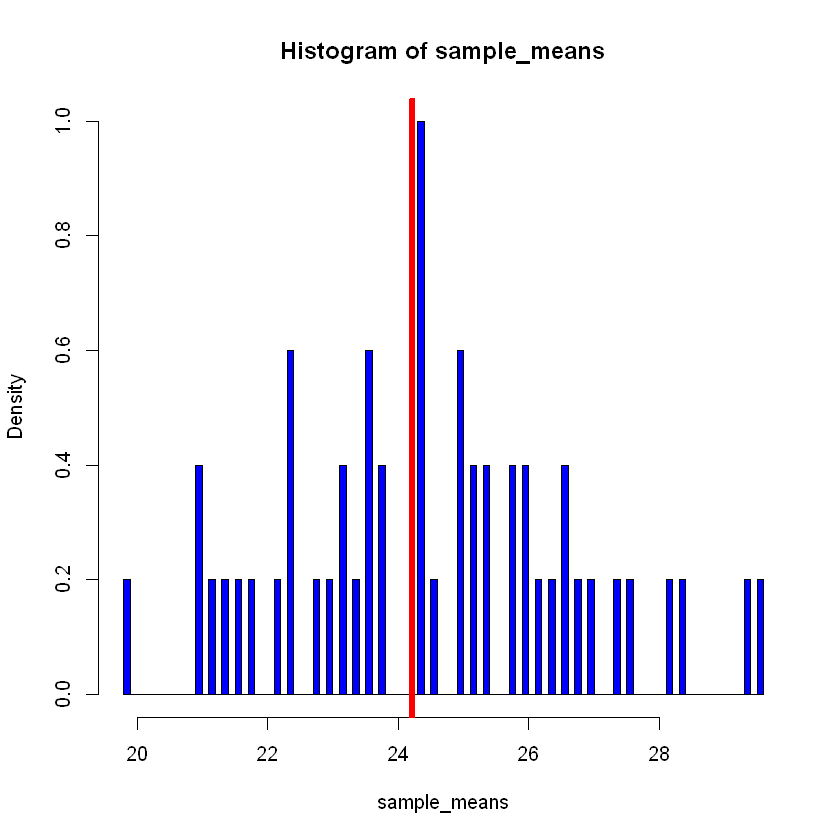

In [156]:
samples = replicate(50, sample(Animal_data$Time, 5))
sample_means = apply(samples, 2, mean)
hist(sample_means, col = "blue" ,breaks = 100, probability = TRUE)
population_mean = mean(Animal_data$Time)
abline(v = population_mean, col = "Red", lwd = 5)

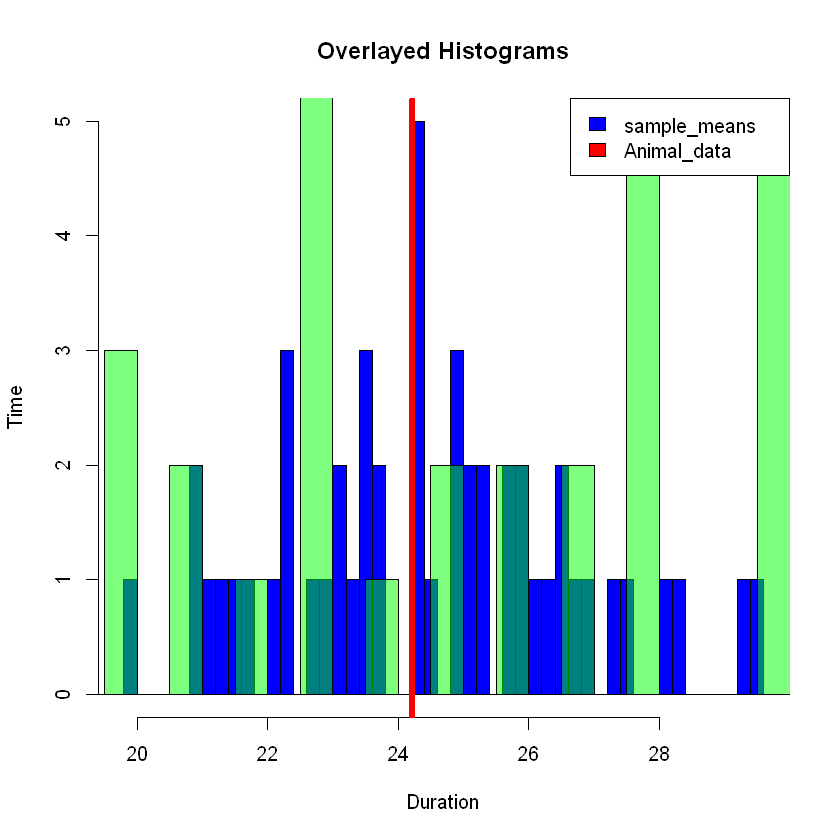

In [170]:
hist(sample_means, col = rgb(0, 0, 1, alpha = 1), main = "Overlayed Histograms", xlab = "Duration", breaks = 50, ylab = "Time",)
hist(Animal_data$Time, col = rgb(0, 1, 0, alpha = 0.5), breaks = 50, add = TRUE)
legend("topright", legend = c("sample_means", "Animal_data"), fill = c("blue", "red"))
abline(v = population_mean, col = "red", lwd = 5)

##### A :  SD for sampling distribution is 6.16 and in our data it equals 6.69, and mean for sampling distribution is 24.33 and in our data it equals 24.22 which both SD and Means are very close numbers, which means that our data distribution might be normal. 

##### B : The sampling distribution of the sample mean seems normally distributed, centered around the population mean. This is because the Central Limit Theorem claims that the sampling distribution of the mean of any size will be almost normally distributed, no matter of the shape of the population distribution, as the sample size increases.

##### C : This information does infact respond to our predicitons, which also corresponds to shapiro test results which claims the data we're dealing with is infact normally distributed
##### D : As we Increase the number of samples gathered, the dristribution gets closer and closer to normal distribution, which is what Central Limit Theorem claims it to be, N number of sample means, when n = ∞, the distribution of sample means is normal everytime.

##### E : I did not find any difference when we changed the number of sample size from 5 to 15.


In [58]:
samples_sd = sd(samples)
samples_variance = var(samples)

In [171]:
sample_bigmean = mean(sample_means)
sample_bigmean

[1] 24.556

In [44]:
Animal_sd = sd(Animal_data$Time)

In [49]:
Animal_sd

[1] 6.694261

In [46]:
Animal_means = mean(Animal_data$Time)

In [47]:
Animal_means

[1] 24.22222

In [8]:
model <- lm(Time ~ Duration * Area, data = Animal_data)
get_df(model) # same as df.residual(model)
get_df(model, type = "model") # same as attr(logLik(model), "df")

[1] 39

[1] 7

In [49]:
Animal_data %>% levene_test(Time ~ Duration * Area)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
8,36,0.1355422,0.9970647


# Question NO. 8

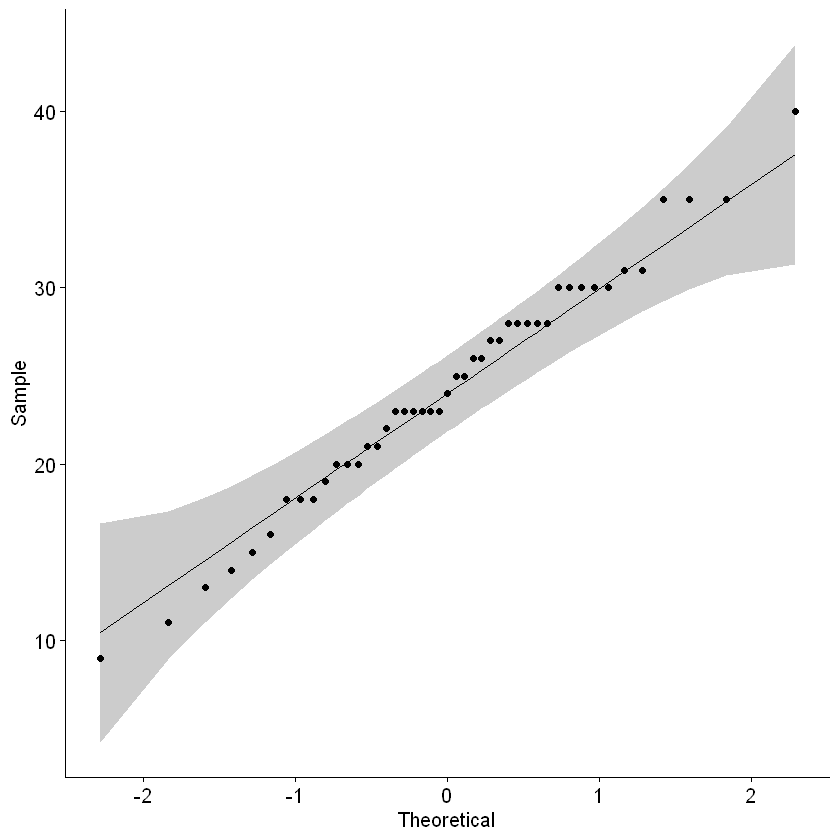

In [83]:
ggqqplot(Animal_data, "Time")

##### Checking our the QQ plot of our data seems that almost all of our data falls within our confidence interval.

# Question No. 9

##### Since we have 9 independent group in our data, and out goal is to compare their mean, and null hypothesis would be that, non of those 9 groups' means differ at all, and research hypothesis would be that at least one pair of groups differ in their mean.

#### Based on the explanation above, we must use ANOVA hypothesis test since we have more than a pair of groups, and since the groups are independent and we don't have any within groups' comparison, its a TWO WAY CLASSIC ANOVA.

In [89]:
anova_test(Animal_data, Time ~ Duration * Area)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Duration,2,36,3.217,0.052,,0.152
2,Area,2,36,6.074,0.005,*,0.252
3,Duration:Area,4,36,3.172,0.025,*,0.261


##### ANOVA test result shows that our Null hypothesis is wrong, and Duration:Area colaboration is indeed meaningful in 0.05 alpha.
##### But Single handedly, Duration has no significant effect, meanwhile Area of Stimulation is indeed single handedly effectful on our data.

# Post-Hoc test

In [90]:
Animal_data %>% group_by(Area) %>% anova_test(Time ~ Duration)

,Area,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,AreaA,Duration,2,12,4.528,0.034,*,0.430
2,AreaB,Duration,2,12,6.425,0.013,*,0.517
3,Neutral,Duration,2,12,0.017,0.984,,0.003


##### This oneway ANOVA shows that only Areas A and B have significant effect, which was predictible from the begining.

In [92]:
Animal_data %>% group_by(Duration) %>% anova_test(Time ~ Area)

,Duration,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Long,Area,2,12,0.133,0.876,,0.022
2,Moderate,Area,2,12,7.171,0.009,*,0.544
3,Short,Area,2,12,4.887,0.028,*,0.449


##### And here we see that between Durations, only duraiton 50 and 100ms have effects, this one way ANOVA is useless!! its not our main goal is to see which area with what Duration effets animals learning. 50 or 100ms one star doesn't tell much.

In [93]:
Animal_data %>% group_by(Duration) %>% emmeans_test(Time ~ Area, p.adjust.method = "bonferroni")

,Duration,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Long,Area,Time,AreaA,AreaB,36,0.1168191,0.907652697,1.000000000,ns
2,Long,Area,Time,AreaA,Neutral,36,-0.3504573,0.728037926,1.000000000,ns
3,Long,Area,Time,AreaB,Neutral,36,-0.4672764,0.643118245,1.000000000,ns
4,Moderate,Area,Time,AreaA,AreaB,36,2.0443342,0.048287184,0.144861551,ns
5,Moderate,Area,Time,AreaA,Neutral,36,-1.4602387,0.152897216,0.458691648,ns
6,Moderate,Area,Time,AreaB,Neutral,36,-3.5045730,0.001243002,0.003729006,**
7,Short,Area,Time,AreaA,AreaB,36,-2.2195629,0.032836378,0.098509134,ns
8,Short,Area,Time,AreaA,Neutral,36,-3.4461634,0.001462476,0.004387428,**
9,Short,Area,Time,AreaB,Neutral,36,-1.2266005,0.227935062,0.683805185,ns


##### And for the last Post-Hoc test at the lowest level, Bonferroni, shows that Area.A with 50ms stimulation, in comparison to Neutral group is Significant, and AreaB with 100ms Stimulation, is significant in comparison to Neutral Group.

In [94]:
Animal_data %>% cohens_d(Time ~ Area, mu = 6.69)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Time,AreaA,AreaB,-0.01026364,15,15,negligible
2,Time,AreaA,Neutral,-0.99080305,15,15,large
3,Time,AreaB,Neutral,-0.98145231,15,15,large


##### Cohen's D Effect Size Exam was taken to have glance at Magnitude of Effect after we found out that we have significany in our test. which shows Area A and Area B stimulation have large magnitude, which means the stimulation is significantly effective in REAL WORLD.

### 95% confidence interval for the mean


In [172]:
confidence_interval = t.test(Animal_data$Time)$conf.int

print(paste("95% Confidence Interval for the Mean:", round(confidence_interval, 4)))

[1] "95% Confidence Interval for the Mean: 22.211" 
[2] "95% Confidence Interval for the Mean: 26.2334"


# Question No. 10

In [175]:
skewness(Animal_data$Time)
kurtosis(Animal_data$Time)

[1] -0.09538783

[1] 2.80896

#### Skewness is close to zero and kurtosis is close to 3, so we can say that out data distribution is probably Symmetric.